In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
# np.random.seed(0)

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [11]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 2  # try setting the value to integer (e.g. 1, 2, 3), and check the differences

# define the input and output sequence data
dataX = []
dataY = []

print("Training data: \n" )

for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)  # print out the sequence data

Training data: 

AB -> C
BC -> D
CD -> E
DE -> F
EF -> G
FG -> H
GH -> I
HI -> J
IJ -> K
JK -> L
KL -> M
LM -> N
MN -> O
NO -> P
OP -> Q
PQ -> R
QR -> S
RS -> T
ST -> U
TU -> V
UV -> W
VW -> X
WX -> Y
XY -> Z


In [4]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (len(dataX), seq_length, 1))

# normalize
X = X / float(len(alphabet))

# one-hot encode the output data
y = np_utils.to_categorical(dataY)

In [6]:
# create and fit the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())

#model.fit(X, y, epochs=500, batch_size=1, verbose=0)
history = model.fit(X, y, epochs=1000, batch_size=len(dataX), verbose=0, shuffle=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 26)                858       
Total params: 5,210
Trainable params: 5,210
Non-trainable params: 0
_________________________________________________________________
None


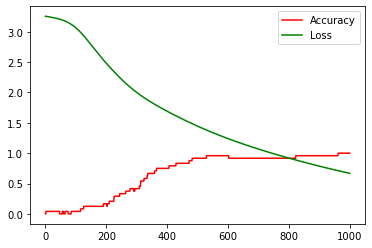

In [7]:
# plot the loss and accuracy curves
plt.plot(history.history['accuracy'], label='Accuracy', color='red')
plt.plot(history.history["loss"], label="Loss",  color='green')
plt.legend()

In [8]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%% \n" % (scores[1]*100) )

# demonstrate some model predictions
for pattern in dataX:
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    seq_out = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", seq_out)

Model Accuracy: 100.00% 

['A', 'B'] -> C
['B', 'C'] -> D
['C', 'D'] -> E
['D', 'E'] -> F
['E', 'F'] -> G
['F', 'G'] -> H
['G', 'H'] -> I
['H', 'I'] -> J
['I', 'J'] -> K
['J', 'K'] -> L
['K', 'L'] -> M
['L', 'M'] -> N
['M', 'N'] -> O
['N', 'O'] -> P
['O', 'P'] -> Q
['P', 'Q'] -> R
['Q', 'R'] -> S
['R', 'S'] -> T
['S', 'T'] -> U
['T', 'U'] -> V
['U', 'V'] -> W
['V', 'W'] -> X
['W', 'X'] -> Y
['X', 'Y'] -> Z


In [13]:
# demonstrate predicting random patterns

test_number = 3   #number of random patterns to demonstrate

print("Test a Random Pattern:")
for i in range(0, test_number):
    pattern_index = np.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

Test a Random Pattern:
['S', 'T'] -> U
['E', 'F'] -> G
['N', 'O'] -> P
